In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import time
import io
from google.colab import files

***
# Загрузка Данных

##### Самолёты

In [ ]:
uploaded = files.upload()
aircrafts = pd.read_csv(io.BytesIO(uploaded["aircrafts_data_202212141833.csv"]))
aircrafts

Saving aircrafts_data_202212141833.csv to aircrafts_data_202212141833.csv


,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


##### Аэропорты

In [ ]:
uploaded = files.upload()
airports = pd.read_csv(io.BytesIO(uploaded["airports_data_202212141833.csv"]))
airports

Saving airports_data_202212141833.csv to airports_data_202212141833.csv


,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.093299865722656)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.52799987793)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.45399475097656,53.16790008544922)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.71800231933594,46.88869857788086)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.75080108642578,68.78170013427734)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.38500213623047,53.7400016784668)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.53849792480469,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.347301483154,45.002101898193)",Europe/Moscow


##### Места

In [ ]:
uploaded = files.upload()
seats = pd.read_csv(io.BytesIO(uploaded["seats_202212141833.csv"]))
seats

Saving seats_202212141833.csv to seats_202212141833.csv


,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [ ]:
seats.groupby(['fare_conditions']).count()

,aircraft_code,seat_no
fare_conditions,,
Business,152,152
Comfort,48,48
Economy,1139,1139


In [ ]:
seats.groupby(['aircraft_code', 'fare_conditions']).count()

seat_no
aircraft_code fare_conditions         
319           Business              20
              Economy               96
320           Business              20
              Economy              120
321           Business              28
              Economy              142
733           Business              12
              Economy              118
763           Business              30
              Economy              192
773           Business              30
              Comfort               48
              Economy              324
CN1           Economy               12
CR2           Economy               50
SU9           Business              12
              Economy               85

##### Рейсы

In [ ]:
uploaded = files.upload()
flights = pd.read_csv(io.BytesIO(uploaded["flights_202212141833.csv"]))
flights.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
flights

Saving flights_202212141833.csv to flights_202212141833.csv


,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00.000 +0300,2017-09-10 14:55:00.000 +0300,DME,BTK,Scheduled,319,2017-09-10 09:50:00.000 +0300,2017-09-10 14:55:00.000 +0300
1,3979,PG0052,2017-08-25 14:50:00.000 +0300,2017-08-25 17:35:00.000 +0300,VKO,HMA,Scheduled,CR2,2017-08-25 14:50:00.000 +0300,2017-08-25 17:35:00.000 +0300
2,4739,PG0561,2017-09-05 12:30:00.000 +0300,2017-09-05 14:15:00.000 +0300,VKO,AER,Scheduled,763,2017-09-05 12:30:00.000 +0300,2017-09-05 14:15:00.000 +0300
3,5502,PG0529,2017-09-12 09:50:00.000 +0300,2017-09-12 11:20:00.000 +0300,SVO,UFA,Scheduled,763,2017-09-12 09:50:00.000 +0300,2017-09-12 11:20:00.000 +0300
4,6938,PG0461,2017-09-04 12:25:00.000 +0300,2017-09-04 13:20:00.000 +0300,SVO,ULV,Scheduled,SU9,2017-09-04 12:25:00.000 +0300,2017-09-04 13:20:00.000 +0300
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00.000 +0300,2017-08-02 20:10:00.000 +0300,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00.000 +0300,2017-08-02 20:10:00.000 +0300
33117,33118,PG0063,2017-07-28 19:25:00.000 +0300,2017-07-28 20:10:00.000 +0300,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00.000 +0300,2017-07-28 20:15:00.000 +0300
33118,33119,PG0063,2017-09-08 19:25:00.000 +0300,2017-09-08 20:10:00.000 +0300,SKX,SVO,Scheduled,CR2,2017-09-08 19:25:00.000 +0300,2017-09-08 20:10:00.000 +0300
33119,33120,PG0063,2017-08-01 19:25:00.000 +0300,2017-08-01 20:10:00.000 +0300,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00.000 +0300,2017-08-01 20:12:00.000 +0300


##### Бронирования

In [3]:
uploaded = files.upload()
bookings = pd.read_csv(io.BytesIO(uploaded["bookings_202212141833.csv"]))
bookings

Saving bookings_202212141833.csv to bookings_202212141833.csv


,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00.000 +0300,265700.0
1,000012,2017-07-14 09:02:00.000 +0300,37900.0
2,000068,2017-08-15 14:27:00.000 +0300,18100.0
3,000181,2017-08-10 13:28:00.000 +0300,131800.0
4,0002D8,2017-08-07 21:40:00.000 +0300,23600.0
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00.000 +0300,56000.0
262784,FFFF2C,2017-08-08 05:55:00.000 +0300,10800.0
262785,FFFF43,2017-07-20 20:42:00.000 +0300,78500.0
262786,FFFFA8,2017-08-08 04:45:00.000 +0300,28800.0


##### Посадочные талоны

In [ ]:
uploaded = files.upload()
boarding_passes = pd.read_csv(io.BytesIO(uploaded["boarding_passes_202212141833.csv"]))
boarding_passes

Saving boarding_passes_202212141833.csv to boarding_passes_202212141833.csv


,ticket_no,flight_id,boarding_no,seat_no
0,5435212351,30625,1,2D
1,5435212386,30625,2,3G
2,5435212381,30625,3,4H
3,5432211370,30625,4,5D
4,5435212357,30625,5,11A
...,...,...,...,...
579681,5434302871,19945,85,20F
579682,5432892791,19945,86,21C
579683,5434302869,19945,87,20E
579684,5432802476,19945,88,21F


##### Билеты

In [ ]:
uploaded = files.upload()
tickets = pd.read_csv(io.BytesIO(uploaded["tickets_202212141833.csv"]))
tickets

Saving tickets_202212141833.csv to tickets_202212141833.csv


,Unnamed: 0,ticket_no,book_ref,passenger_id,passenger_name
0,0,5432000987,06B046,8149 604011,VALERIY TIKHONOV
1,1,5432000988,06B046,8499 420203,EVGENIYA ALEKSEEVA
2,2,5432000989,E170C3,1011 752484,ARTUR GERASIMOV
3,3,5432000990,E170C3,4849 400049,ALINA VOLKOVA
4,4,5432000991,F313DD,6615 976589,MAKSIM ZHUKOV
...,...,...,...,...,...
366728,366728,5435999869,D730BA,0474 690760,IRINA SIDOROVA
366729,366729,5435999870,D730BA,6535 751108,MARIYA LAZAREVA
366730,366730,5435999871,A1AD46,1596 156448,MAKSIM SERGEEV
366731,366731,5435999872,7B6A53,9374 822707,NURIYA PETROVA


##### Перелёты

In [4]:
uploaded = files.upload()
ticket_flights = pd.read_csv(io.BytesIO(uploaded["ticket_flights_202212141833.csv"]))
ticket_flights

Saving ticket_flights_202212141833.csv to ticket_flights_202212141833.csv


,ticket_no,flight_id,fare_conditions,amount
0,5432159776,30625,Business,42100.0
1,5435212351,30625,Business,42100.0
2,5435212386,30625,Business,42100.0
3,5435212381,30625,Business,42100.0
4,5432211370,30625,Business,42100.0
...,...,...,...,...
1045721,5435097522,32094,Economy,5200.0
1045722,5435097521,32094,Economy,5200.0
1045723,5435104384,32094,Economy,5200.0
1045724,5435104352,32094,Economy,5200.0


##### Представление самолётов

In [ ]:
uploaded = files.upload()
v_aircrafts = pd.read_csv(io.BytesIO(uploaded["v_aircrafts_202212141833.csv"]))
v_aircrafts.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
v_aircrafts

Saving v_aircrafts_202212141833.csv to v_aircrafts_202212141833.csv


,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


##### Представление аэропортов

In [ ]:
uploaded = files.upload()
v_airports = pd.read_csv(io.BytesIO(uploaded["v_airports_202212141833.csv"]))
v_airports.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
v_airports

Saving v_airports_202212141833.csv to v_airports_202212141833.csv


,Unnamed: 0,airport_code,airport_name,city,coordinates,timezone
0,0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.093299865722656)",Asia/Yakutsk
1,1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.52799987793)",Asia/Vladivostok
3,3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.45399475097656,53.16790008544922)",Asia/Kamchatka
4,4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.71800231933594,46.88869857788086)",Asia/Sakhalin
...,...,...,...,...,...,...
99,99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.75080108642578,68.78170013427734)",Europe/Moscow
100,100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.38500213623047,53.7400016784668)",Asia/Krasnoyarsk
101,101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.53849792480469,53.363800048828125)",Asia/Krasnoyarsk
102,102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.347301483154,45.002101898193)",Europe/Moscow


##### Представление путей следования

In [ ]:
uploaded = files.upload()
v_routes = pd.read_csv(io.BytesIO(uploaded["v_routes_202212141833.csv"]))
v_routes.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
v_routes

Saving v_routes_202212141833.csv to v_routes_202212141833 (1).csv


,flight_no,departure_airport,arrival_airport,aircraft_code,duration,days_of_week
0,PG0001,UIK,SGC,CR2,02:20:00,{6}
1,PG0002,SGC,UIK,CR2,02:20:00,{7}
2,PG0003,IWA,AER,CR2,02:10:00,"{2,6}"
3,PG0004,AER,IWA,CR2,02:10:00,"{3,7}"
4,PG0005,DME,PKV,CN1,02:05:00,"{2,5,7}"
...,...,...,...,...,...,...
705,PG0706,GDX,SCW,763,06:25:00,{2}
706,PG0707,OVS,SGC,733,00:45:00,"{1,2,3,4,5,6,7}"
707,PG0708,SGC,OVS,733,00:45:00,"{1,2,3,4,5,6,7}"
708,PG0709,DME,CNN,319,06:40:00,{1}


##### Представление рейсов

In [5]:
uploaded = files.upload()
v_flights = pd.read_csv(io.BytesIO(uploaded["v_flights_v_202212141833.csv"]))
v_flights.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
v_flights

Saving v_flights_v_202212141833.csv to v_flights_v_202212141833.csv


,flight_id,flight_no,scheduled_departure,scheduled_departure_local,scheduled_arrival,scheduled_arrival_local,scheduled_duration,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_departure_local,actual_arrival,actual_arrival_local,actual_duration
0,1185,PG0134,2017-09-10 09:50:00.000 +0300,2017-09-10 09:50:00.000,2017-09-10 14:55:00.000 +0300,2017-09-10 19:55:00.000,05:05:00,DME,BTK,Scheduled,319,2017-09-10 09:50:00.000 +0300,2017-09-10 09:50:00.000,2017-09-10 14:55:00.000 +0300,2017-09-10 19:55:00.000,05:05:00
1,3979,PG0052,2017-08-25 14:50:00.000 +0300,2017-08-25 14:50:00.000,2017-08-25 17:35:00.000 +0300,2017-08-25 19:35:00.000,02:45:00,VKO,HMA,Scheduled,CR2,2017-08-25 14:50:00.000 +0300,2017-08-25 14:50:00.000,2017-08-25 17:35:00.000 +0300,2017-08-25 19:35:00.000,02:45:00
2,4739,PG0561,2017-09-05 12:30:00.000 +0300,2017-09-05 12:30:00.000,2017-09-05 14:15:00.000 +0300,2017-09-05 14:15:00.000,01:45:00,VKO,AER,Scheduled,763,2017-09-05 12:30:00.000 +0300,2017-09-05 12:30:00.000,2017-09-05 14:15:00.000 +0300,2017-09-05 14:15:00.000,01:45:00
3,5502,PG0529,2017-09-12 09:50:00.000 +0300,2017-09-12 09:50:00.000,2017-09-12 11:20:00.000 +0300,2017-09-12 13:20:00.000,01:30:00,SVO,UFA,Scheduled,763,2017-09-12 09:50:00.000 +0300,2017-09-12 09:50:00.000,2017-09-12 11:20:00.000 +0300,2017-09-12 13:20:00.000,01:30:00
4,6938,PG0461,2017-09-04 12:25:00.000 +0300,2017-09-04 12:25:00.000,2017-09-04 13:20:00.000 +0300,2017-09-04 14:20:00.000,00:55:00,SVO,ULV,Scheduled,SU9,2017-09-04 12:25:00.000 +0300,2017-09-04 12:25:00.000,2017-09-04 13:20:00.000 +0300,2017-09-04 14:20:00.000,00:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00.000 +0300,2017-08-02 19:25:00.000,2017-08-02 20:10:00.000 +0300,2017-08-02 20:10:00.000,00:45:00,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00.000 +0300,2017-08-02 19:25:00.000,2017-08-02 20:10:00.000 +0300,2017-08-02 20:10:00.000,00:45:00
33117,33118,PG0063,2017-07-28 19:25:00.000 +0300,2017-07-28 19:25:00.000,2017-07-28 20:10:00.000 +0300,2017-07-28 20:10:00.000,00:45:00,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00.000 +0300,2017-07-28 19:30:00.000,2017-07-28 20:15:00.000 +0300,2017-07-28 20:15:00.000,00:45:00
33118,33119,PG0063,2017-09-08 19:25:00.000 +0300,2017-09-08 19:25:00.000,2017-09-08 20:10:00.000 +0300,2017-09-08 20:10:00.000,00:45:00,SKX,SVO,Scheduled,CR2,2017-09-08 19:25:00.000 +0300,2017-09-08 19:25:00.000,2017-09-08 20:10:00.000 +0300,2017-09-08 20:10:00.000,00:45:00
33119,33120,PG0063,2017-08-01 19:25:00.000 +0300,2017-08-01 19:25:00.000,2017-08-01 20:10:00.000 +0300,2017-08-01 20:10:00.000,00:45:00,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00.000 +0300,2017-08-01 19:26:00.000,2017-08-01 20:12:00.000 +0300,2017-08-01 20:12:00.000,00:46:00


***
# Аналитика

In [ ]:
bookings.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,total_amount
count,262788.00000
mean,79025.60581
std,77621.92272
min,3400.00000
25%,29000.00000
50%,55900.00000
75%,99200.00000
max,1204500.00000


In [ ]:
ticket_flights.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,ticket_no,flight_id,amount
count,1045726.00000,1045726.00000,1045726.00000
mean,5434081331.85621,14110.05780,19858.91228
std,1097934.76933,9732.94399,22612.38751
min,5432000987.00000,1.00000,3000.00000
25%,5433159275.25000,5501.00000,7200.00000
50%,5434081842.00000,11926.00000,13400.00000
75%,5435038631.00000,23039.00000,23100.00000
max,5435999873.00000,33121.00000,203300.00000


In [ ]:
# v_aircrafts.describe()

[Text(0.5, 1.0, 'Ticket price')]

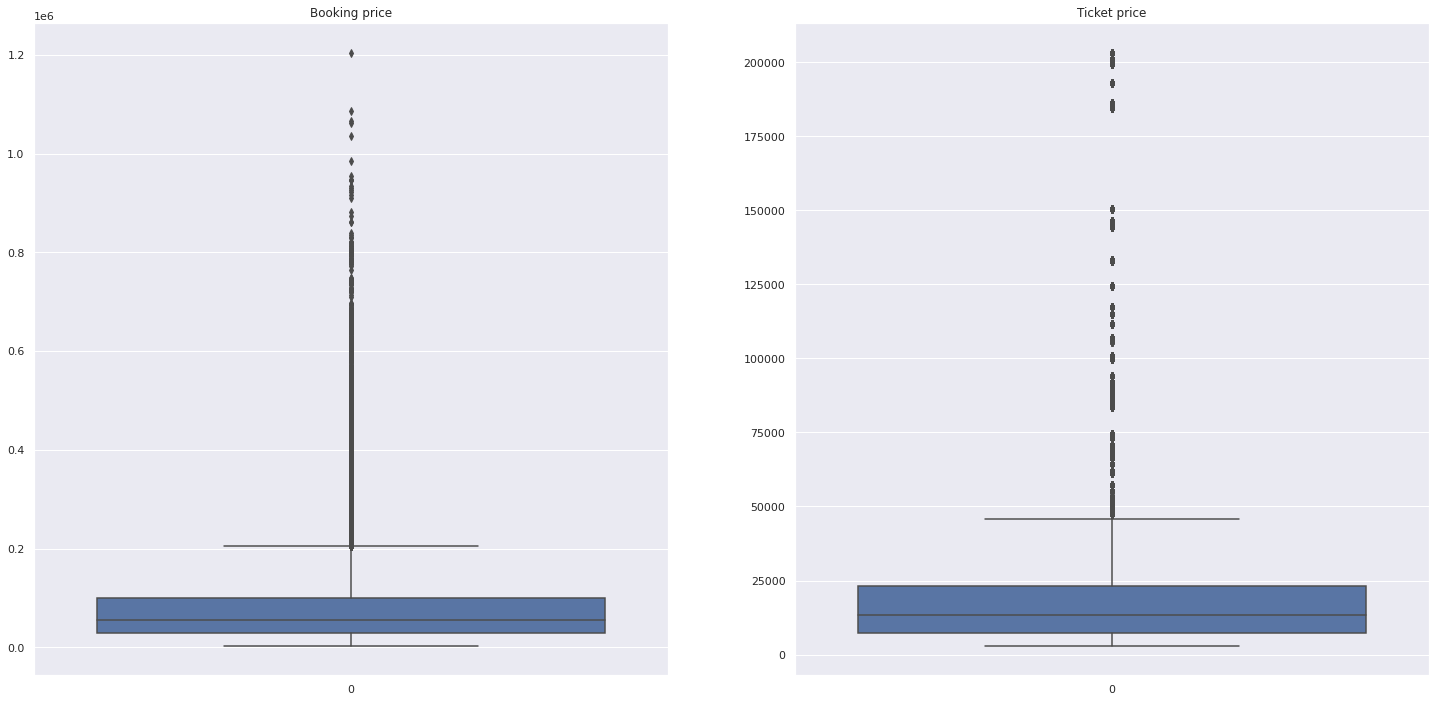

In [6]:
sns.set(rc={"figure.figsize":(25, 12)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
sns.boxplot(data=bookings.total_amount, ax=ax1).set(title='Booking price')
sns.boxplot(data=ticket_flights.amount, ax=ax2).set(title='Ticket price')
#sns.boxplot(data=v_aircrafts.range, ax=ax3).set(title='Aircrat range')

##### Преобразование строк длительности полёта в числовой формат

In [7]:
t1 = pd.DataFrame()
t1[['h', 'm', 's']] = v_flights['scheduled_duration'].str.split(':', expand=True).astype(float)
v_flights['scheduled_duration'] = t1['h']*60 + t1['m'] + t1['s']

t2 = pd.DataFrame()
t2[['h', 'm', 's']] = v_flights['actual_duration'].str.split(':', expand=True).astype(float)
v_flights['actual_duration'] = t2['h']*60 + t2['m'] + t2['s']/60

v_flights

,flight_id,flight_no,scheduled_departure,scheduled_departure_local,scheduled_arrival,scheduled_arrival_local,scheduled_duration,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_departure_local,actual_arrival,actual_arrival_local,actual_duration
0,1185,PG0134,2017-09-10 09:50:00.000 +0300,2017-09-10 09:50:00.000,2017-09-10 14:55:00.000 +0300,2017-09-10 19:55:00.000,305.0,DME,BTK,Scheduled,319,2017-09-10 09:50:00.000 +0300,2017-09-10 09:50:00.000,2017-09-10 14:55:00.000 +0300,2017-09-10 19:55:00.000,305.0
1,3979,PG0052,2017-08-25 14:50:00.000 +0300,2017-08-25 14:50:00.000,2017-08-25 17:35:00.000 +0300,2017-08-25 19:35:00.000,165.0,VKO,HMA,Scheduled,CR2,2017-08-25 14:50:00.000 +0300,2017-08-25 14:50:00.000,2017-08-25 17:35:00.000 +0300,2017-08-25 19:35:00.000,165.0
2,4739,PG0561,2017-09-05 12:30:00.000 +0300,2017-09-05 12:30:00.000,2017-09-05 14:15:00.000 +0300,2017-09-05 14:15:00.000,105.0,VKO,AER,Scheduled,763,2017-09-05 12:30:00.000 +0300,2017-09-05 12:30:00.000,2017-09-05 14:15:00.000 +0300,2017-09-05 14:15:00.000,105.0
3,5502,PG0529,2017-09-12 09:50:00.000 +0300,2017-09-12 09:50:00.000,2017-09-12 11:20:00.000 +0300,2017-09-12 13:20:00.000,90.0,SVO,UFA,Scheduled,763,2017-09-12 09:50:00.000 +0300,2017-09-12 09:50:00.000,2017-09-12 11:20:00.000 +0300,2017-09-12 13:20:00.000,90.0
4,6938,PG0461,2017-09-04 12:25:00.000 +0300,2017-09-04 12:25:00.000,2017-09-04 13:20:00.000 +0300,2017-09-04 14:20:00.000,55.0,SVO,ULV,Scheduled,SU9,2017-09-04 12:25:00.000 +0300,2017-09-04 12:25:00.000,2017-09-04 13:20:00.000 +0300,2017-09-04 14:20:00.000,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00.000 +0300,2017-08-02 19:25:00.000,2017-08-02 20:10:00.000 +0300,2017-08-02 20:10:00.000,45.0,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00.000 +0300,2017-08-02 19:25:00.000,2017-08-02 20:10:00.000 +0300,2017-08-02 20:10:00.000,45.0
33117,33118,PG0063,2017-07-28 19:25:00.000 +0300,2017-07-28 19:25:00.000,2017-07-28 20:10:00.000 +0300,2017-07-28 20:10:00.000,45.0,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00.000 +0300,2017-07-28 19:30:00.000,2017-07-28 20:15:00.000 +0300,2017-07-28 20:15:00.000,45.0
33118,33119,PG0063,2017-09-08 19:25:00.000 +0300,2017-09-08 19:25:00.000,2017-09-08 20:10:00.000 +0300,2017-09-08 20:10:00.000,45.0,SKX,SVO,Scheduled,CR2,2017-09-08 19:25:00.000 +0300,2017-09-08 19:25:00.000,2017-09-08 20:10:00.000 +0300,2017-09-08 20:10:00.000,45.0
33119,33120,PG0063,2017-08-01 19:25:00.000 +0300,2017-08-01 19:25:00.000,2017-08-01 20:10:00.000 +0300,2017-08-01 20:10:00.000,45.0,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00.000 +0300,2017-08-01 19:26:00.000,2017-08-01 20:12:00.000 +0300,2017-08-01 20:12:00.000,46.0


In [ ]:
'''
t3 = pd.DataFrame()
t3[['h', 'm', 's']] = v_routes['duration'].str.split(':', expand=True).astype(float)
v_routes['duration'] = t3['h']*60 + t3['m'] + t3['s']/60
v_routes
'''

##### Длительности полётов

In [14]:
v_flights['scheduled_duration'] = pd.to_numeric(v_flights['scheduled_duration'])
v_flights['actual_duration'] = pd.to_numeric(v_flights['actual_duration'])
v_flights[["scheduled_duration","actual_duration"]].describe(include="all")

,scheduled_duration,actual_duration
count,33121.000000,33121.000000
mean,128.407506,128.410676
std,89.741027,89.746417
min,25.000000,24.000000
25%,65.000000,65.000000
50%,115.000000,115.000000
75%,165.000000,165.000000
max,530.000000,541.000000


In [ ]:
# v_routes['duration'].describe()

[Text(0.5, 1.0, 'actual_duration')]

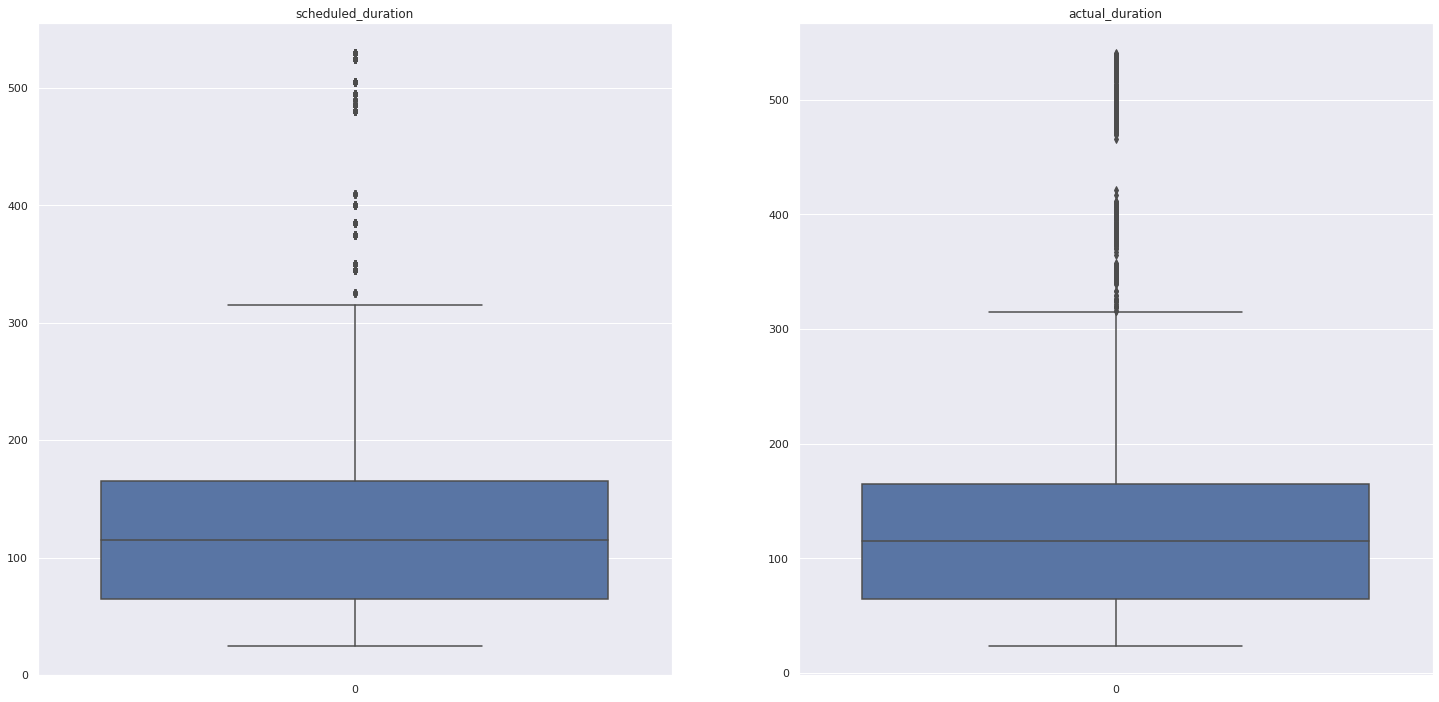

In [9]:
sns.set(rc={"figure.figsize":(25, 12)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
sns.boxplot(data=v_flights.scheduled_duration, ax=ax1).set(title='scheduled_duration')
sns.boxplot(data=v_flights.actual_duration, ax=ax2).set(title='actual_duration')
#sns.boxplot(data=v_routes.duration, ax=ax3).set(title='route_duration')

In [10]:
v_flights['delay'] = v_flights['actual_duration'] - v_flights['scheduled_duration']
v_flights['delay']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
33116    0.0
33117    0.0
33118    0.0
33119    1.0
33120    0.0
Name: delay, Length: 33121, dtype: float64

In [ ]:
v_flights['delay'].astype(bool).sum(axis=0)

9737

In [11]:
tf = pd.DataFrame()
tf['delay'] = v_flights['delay']
tf['aircraft_code'] = v_flights['aircraft_code']
tf.groupby(['aircraft_code']).mean()

,delay
aircraft_code,
319,0.058918
321,0.056865
733,0.070644
763,-0.138411
773,0.014754
CN1,0.004529
CR2,0.001326
SU9,-0.007408


In [12]:
tf1 = v_flights.loc[v_flights['delay'] > 0]
tf1['delay'].agg(['mean', 'median'])

mean      1.698686
median    1.000000
Name: delay, dtype: float64

In [15]:
tf1.drop(columns=['flight_id'], inplace=True)
tf1.groupby(['aircraft_code']).mean()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,scheduled_duration,actual_duration,delay
aircraft_code,,,
319,344.910714,348.164286,3.253571
321,107.654028,109.123223,1.469194
733,177.298578,179.364929,2.066351
763,284.458128,287.177340,2.719212
773,151.902655,153.477876,1.575221
CN1,147.464219,149.056627,1.592408
CR2,134.332103,135.833210,1.501107
SU9,122.909193,124.362108,1.452915


[Text(0.5, 1.0, 'Задержка в минутах')]

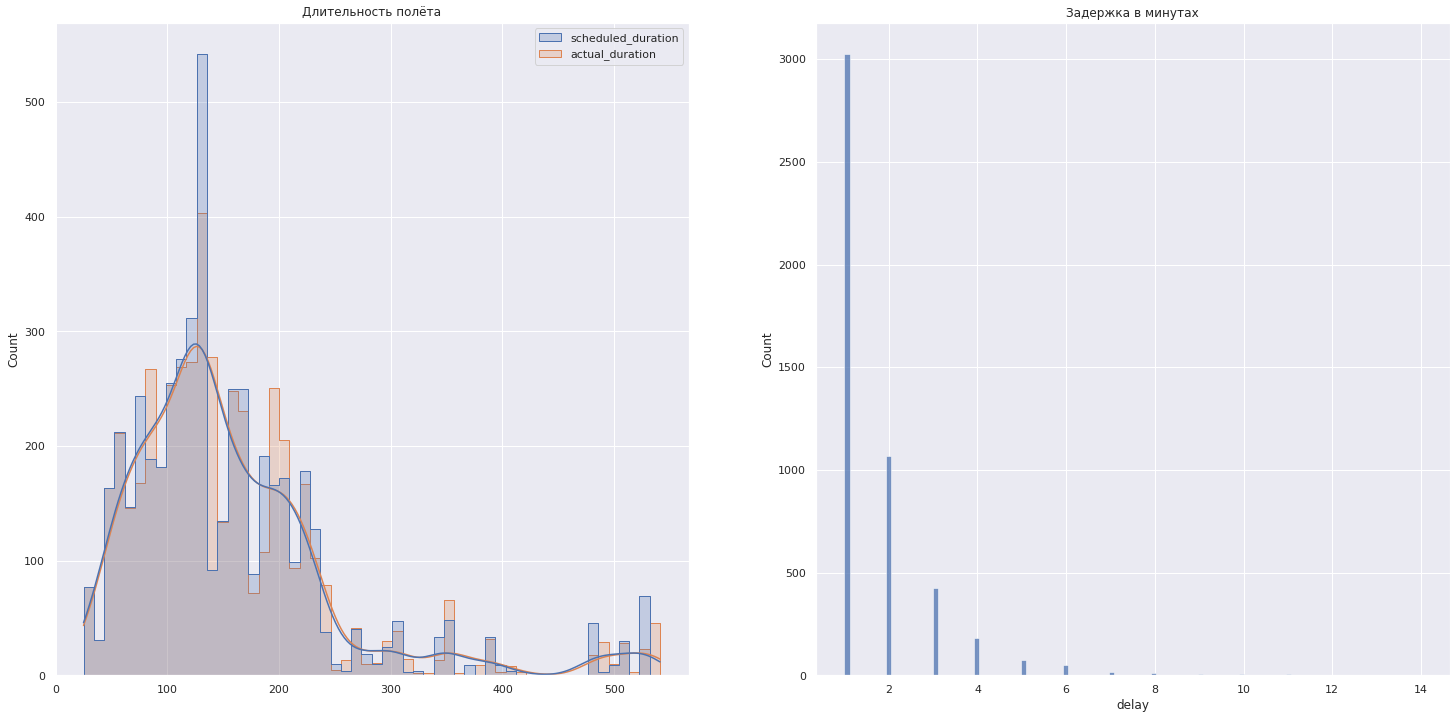

In [13]:
tf1_crop = tf1[['scheduled_duration','actual_duration']].copy()
sns.set(rc={"figure.figsize":(25, 12)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
sns.histplot(data=tf1_crop, ax=ax1, element="step", kde=True).set(title='Длительность полёта')
#sns.histplot(data=tf1.scheduled_duration, ax=ax1, kde=True).set(title='scheduled_duration')
#sns.histplot(data=tf1.actual_duration, ax=ax2, kde=True).set(title='actual_duration')
sns.histplot(data=tf1.delay, ax=ax2).set(title='Задержка в минутах')